In [1]:

import matplotlib.pyplot as plt
import os
import cv2
from os.path import join
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean

from skimage import img_as_float
from scipy import signal

In [17]:
ROOT = os.getcwd()

# get path for input and output images
PATH_INPUT_IMAGES = join(ROOT, "d")
PATH_OUTPUT_IMAGES = join(ROOT, "Results")


In [18]:
def my_imfilter(image,Filter):
    
    # image & filter dimensions
    img_H = image.shape[0]
    img_W = image.shape[0]
    
    fil_H = Filter.shape[0]
    fil_W = Filter.shape[1]

    # Number of channels grey-1    rgb-3
    channels = len(image[0][0])
    
    output = np.zeros((image.shape[0], image.shape[1], channels))

    padded_img = np.zeros((image.shape[0] + Filter.shape[0]-1, image.shape[1] + Filter.shape[1]-1, channels))

    # adjusting image to the in the padded_img
    padded_img[int((Filter.shape[0]-1)/2) : image.shape[0]+int((Filter.shape[0]-1)/2), int((Filter.shape[1]-1)/2) : image.shape[1] + int((Filter.shape[1]-1)/2)] = image

    for k in range(channels):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                output[i][j][k] = np.sum(np.multiply(padded_img[i:i+Filter.shape[0], j:j+Filter.shape[1], k], Filter))
    
    output = np.clip(output, 0, 1) 
    return output

In [19]:
def  vis_hybrid_image(hybrid_image):
    scales = 5#how many downsampled versions to create
    padding = 5 #how many pixels to pad.

    original_height = hybrid_image.shape[0]
    num_colors = hybrid_image.shape[2] #counting how many color channels the input has
    output = hybrid_image
    cur_image = hybrid_image

    for i in range(2,scales+1):
        # add padding
        # output = cat(2, output, np.ones(original_height, padding, num_colors)) #implement the correct command here
        output = np.concatenate((output, np.ones((original_height, padding, num_colors))),axis = 1)
        # dowsample image
        cur_image = resize(cur_image,(cur_image.shape[0] // 2, cur_image.shape[1] // 2), anti_aliasing=True)
        # pad the top and append to the output
        # tmp = cat(1,np.ones(original_height - cur_image.shape[0], cur_image.shape[1], num_colors), cur_image)
        tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis = 0)
        # output = cat(2, output, tmp);    
        output = np.concatenate((output, tmp), axis=1);
    
    return(output)


<Figure size 720x720 with 0 Axes>

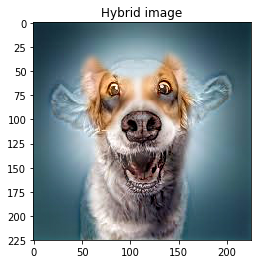

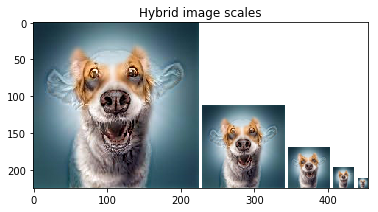

In [21]:

#%% close all figures
plt.close('all') # closes all figures

dog_img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'H.jpg']))
cat_img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'L.jpg']))

#%% Setup
#% read images and convert to floating point format
image1 = mpimg.imread(dog_img_path)
image2 = mpimg.imread(cat_img_path)

image1 = img_as_float(image1) #will provide the low frequencies
image2 = img_as_float(image2) #will provide the high frequencies


""" %% Filtering and Hybrid Image construction """
cutoff_frequency = 3

#filter=[] insert values from fspecial('Gaussian', cutoff_frequency*4+1, cutoff_frequency) here
filter = np.reshape(np.asarray(signal.get_window(('gaussian', cutoff_frequency), cutoff_frequency*4 + 1)), (cutoff_frequency*4 + 1, 1)) ;
filter = filter/np.sum(filter)
filter_transpose = np.transpose(filter)


#low_frequencies = 
low_frequencies = my_imfilter(image1, filter)
low_frequencies = my_imfilter(low_frequencies, filter_transpose)


#high_frequencies = 
low_frequencies_2 = my_imfilter(image2, filter)
low_frequencies_2 = my_imfilter(low_frequencies_2, filter_transpose)
high_frequencies = image2 - low_frequencies_2


#hybrid_image = 
hybrid_image = low_frequencies + high_frequencies

imgLr = np.clip(low_frequencies,0,1)
imgRr = np.clip(high_frequencies + 0.5,0,1)
 
plt.figure(figsize=(10,10))
plt.figure(3)
plt.title("Hybrid image")
plt.imshow(np.clip(hybrid_image,0,1))
plt.show()

vis = vis_hybrid_image(hybrid_image) #see function script vis_hybrid_image.py
plt.figure(4)
plt.title("Hybrid image scales")
plt.imshow(np.clip(vis,0,1))
plt.show()



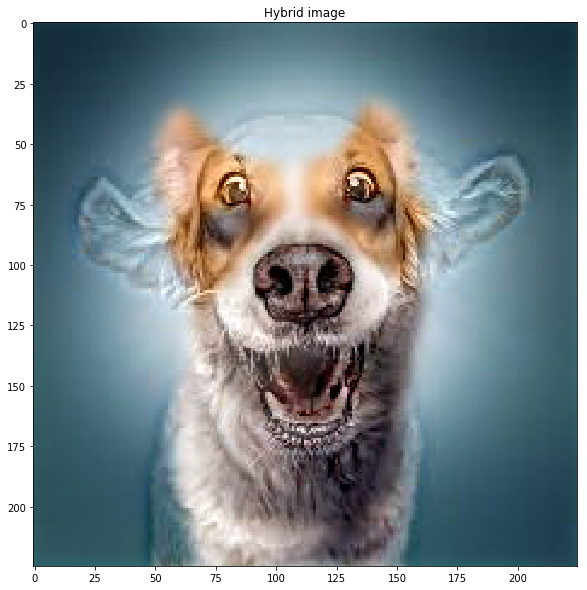

In [26]:
plt.figure(figsize=(20,10))
plt.title("Hybrid image")
plt.imshow(np.clip(hybrid_image,0,1))
plt.show()